In [180]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
cleaned_train = pd.read_csv('test_noNAN.csv')

In [182]:
cleaned_train.info() #3 data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Unnamed: 0     418 non-null int64
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [183]:
cleaned_train['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [184]:
cleaned_train['Unnamed: 0'] #drop noise column

0        0
1        1
2        2
3        3
4        4
      ... 
413    413
414    414
415    415
416    416
417    417
Name: Unnamed: 0, Length: 418, dtype: int64

In [185]:
cleaned_train.drop('Unnamed: 0', inplace=True, axis=1)

In [186]:
cleaned_train.info() #3 data types and 12 features / columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<b>Pclass</b> --> <i>Ticket class</i> : 1 = first_class, 2 = second_class, 3 = third_class

In [187]:
cleaned_train_copy = cleaned_train.copy()

In [188]:
cleaned_train_copy['Passenger_Class'] = np.NaN

In [189]:
cleaned_train_copy.iloc[1]

PassengerId                                     893
Pclass                                            3
Name               Wilkes, Mrs. James (Ellen Needs)
Sex                                          female
Age                                              47
SibSp                                             1
Parch                                             0
Ticket                                       363272
Fare                                              7
Cabin                                      No Cabin
Embarked                                          S
Passenger_Class                                 NaN
Name: 1, dtype: object

In [190]:
index = cleaned_train_copy.index

In [191]:
index

RangeIndex(start=0, stop=418, step=1)

In [192]:
def PassClass(x):
    for i in index:
        if x.loc[i, 'Pclass'] == 1:
            x.loc[i, 'Passenger_Class'] = 'first_class'
        if x.loc[i, 'Pclass'] == 2:
            x.loc[i, 'Passenger_Class'] = 'second_class'
        if x.loc[i, 'Pclass'] == 3:
            x.loc[i, 'Passenger_Class'] = 'third_class'
        else:
            pass

In [193]:
PassClass(cleaned_train_copy)

In [194]:
cleaned_train_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger_Class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,No Cabin,Q,third_class
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,No Cabin,S,third_class
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,No Cabin,Q,second_class
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,No Cabin,S,third_class
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,No Cabin,S,third_class


In [195]:
#OHE for Passenger_Class
PassClass_OHE = pd.get_dummies(cleaned_train_copy['Passenger_Class'])

In [196]:
len(PassClass_OHE)

418

In [197]:
PassClass_OHE

,first_class,second_class,third_class
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,1,0
8,0,0,1
9,0,0,1


In [198]:
cleaned_train_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger_Class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,No Cabin,Q,third_class
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,No Cabin,S,third_class
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,No Cabin,Q,second_class
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,No Cabin,S,third_class
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,No Cabin,S,third_class


In [199]:
cleaned_train_copy_1 = cleaned_train_copy.join(PassClass_OHE).copy() #Join columns with other DataFrame either on index or on a key column

In [200]:
cleaned_train_copy_1.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger_Class,first_class,second_class,third_class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,No Cabin,Q,third_class,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,No Cabin,S,third_class,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,No Cabin,Q,second_class,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,No Cabin,S,third_class,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,No Cabin,S,third_class,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,No Cabin,S,third_class,0,0,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,No Cabin,Q,third_class,0,0,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,No Cabin,S,second_class,0,1,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,No Cabin,C,third_class,0,0,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,No Cabin,S,third_class,0,0,1


In [201]:
Sex_OHE = pd.get_dummies(cleaned_train_copy_1.loc[:, 'Sex'])

In [202]:
Sex_OHE.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [203]:
cleaned_train_copy_2 = cleaned_train_copy_1.join(Sex_OHE).copy()

In [204]:
cleaned_train_copy_2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger_Class,first_class,second_class,third_class,female,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,No Cabin,Q,third_class,0,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,No Cabin,S,third_class,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,No Cabin,Q,second_class,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,No Cabin,S,third_class,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,No Cabin,S,third_class,0,0,1,1,0


(array([ 24.,  24.,  95., 135.,  43.,  38.,  28.,  21.,   9.,   1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <a list of 10 Patch objects>)

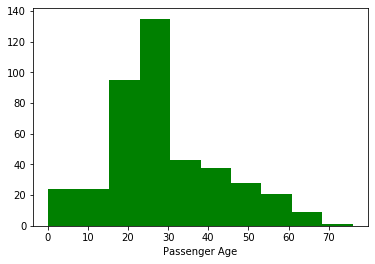

In [205]:
plt.xlabel('Passenger Age')
plt.hist(cleaned_train_copy_2['Age'], color='green') #See the distribution of Passenger Age

In [206]:
#Age classification
infant = range(0, 10)
teenage = range(10, 18)
adult = range(18, 56)
old = range(56, 100)

In [207]:
def AgeClassification(df):
    index = df.index
    AgeDF = pd.DataFrame(index=index, columns=['Age_Class'])
    for i in index:
        if round(df.loc[i, 'Age']) in infant:
            AgeDF.loc[i, 'Age_Class'] = 'infant'
        elif round(df.loc[i, 'Age']) in teenage:
            AgeDF.loc[i, 'Age_Class'] = 'teenage'
        elif round(df.loc[i, 'Age']) in adult:
            AgeDF.loc[i, 'Age_Class'] = 'adult'
        elif round(df.loc[i, 'Age']) in old:
            AgeDF.loc[i, 'Age_Class'] = 'old'
        else:
            print(df.loc[i, 'Age'])
    return AgeDF

In [208]:
AgeDF = AgeClassification(cleaned_train_copy_2)

In [209]:
AgeDF.isna().any()

Age_Class    False
dtype: bool

In [210]:
AgeDF.head(10)

,Age_Class
0,adult
1,adult
2,old
3,adult
4,adult
5,teenage
6,adult
7,adult
8,adult
9,adult


In [211]:
cleaned_train_copy_2 = cleaned_train_copy_2.join(AgeDF).copy()

In [212]:
AgeClass_OHE = pd.get_dummies(cleaned_train_copy_2['Age_Class'])

In [213]:
AgeClass_OHE.head()

,adult,infant,old,teenage
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0


In [214]:
cleaned_train_copy_3 = cleaned_train_copy_2.join(AgeClass_OHE).copy()

In [215]:
cleaned_train_copy_3.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,first_class,second_class,third_class,female,male,Age_Class,adult,infant,old,teenage
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,No Cabin,...,0,0,1,0,1,adult,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,No Cabin,...,0,0,1,1,0,adult,1,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,No Cabin,...,0,1,0,0,1,old,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,No Cabin,...,0,0,1,0,1,adult,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,No Cabin,...,0,0,1,1,0,adult,1,0,0,0


In [216]:
cleaned_train_copy_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
PassengerId        418 non-null int64
Pclass             418 non-null int64
Name               418 non-null object
Sex                418 non-null object
Age                418 non-null float64
SibSp              418 non-null int64
Parch              418 non-null int64
Ticket             418 non-null object
Fare               418 non-null float64
Cabin              418 non-null object
Embarked           418 non-null object
Passenger_Class    418 non-null object
first_class        418 non-null uint8
second_class       418 non-null uint8
third_class        418 non-null uint8
female             418 non-null uint8
male               418 non-null uint8
Age_Class          418 non-null object
adult              418 non-null uint8
infant             418 non-null uint8
old                418 non-null uint8
teenage            418 non-null uint8
dtypes: float64(2), int64(4), object(7), uint8(9

In [217]:
cleaned_train_copy_3['Ticket'].value_counts()

PC 17608         5
CA. 2343         4
113503           4
347077           3
C.A. 31029       3
                ..
237249           1
11770            1
SC/PARIS 2166    1
382650           1
330968           1
Name: Ticket, Length: 363, dtype: int64

In [218]:
cleaned_train_copy_3['Ticket'].values

array(['330911', '363272', '240276', '315154', '3101298', '7538',
       '330972', '248738', '2657', 'A/4 48871', '349220', '694', '21228',
       '24065', 'W.E.P. 5734', 'SC/PARIS 2167', '233734', '2692',
       'STON/O2. 3101270', '2696', 'PC 17603', 'C 17368', 'PC 17598',
       'PC 17597', 'PC 17608', 'A/5. 3337', '113509', '2698', '113054',
       '2662', 'SC/AH 3085', 'C.A. 31029', 'C.A. 2315', 'W./C. 6607',
       '13236', '2682', '342712', '315087', '345768', '1601', '349256',
       '113778', 'SOTON/O.Q. 3101263', '237249', '11753',
       'STON/O 2. 3101291', 'PC 17594', '370374', '11813', 'C.A. 37671',
       '13695', 'SC/PARIS 2168', '29105', '19950', 'SC/A.3 2861',
       '382652', '349230', '348122', '386525', 'PC 17608', '349232',
       '237216', '347090', '334914', 'PC 17608', 'F.C.C. 13534', '330963',
       '113796', '2543', '19950', '382653', '349211', '3101297',
       'PC 17562', '113503', '113503', '359306', '11770', '248744',
       '368702', '2678', 'PC 17483',

In [219]:
"""will categories ticket by 3 types
1. decimal --> decimal number ticket
2. alphanum --> decimal and character ticket
3. character --> character ticket
"""
import re
decimal = re.compile(r'[0-9]+')
alphanum = re.compile(r'[0-9a-zA-Z\s\S]{2, 100}')
character = re.compile(r'[a-zA-Z]+')

In [220]:
def TicketClass(df):
    index = df.index
    TicketCatDF = pd.DataFrame(index=index, columns=['TicketCat'])
    for i in index:
        if decimal.fullmatch(df.loc[i, 'Ticket']):
            TicketCatDF.loc[i, 'TicketCat'] = 'decimal_ticket'
        elif character.fullmatch(df.loc[i, 'Ticket']):
             TicketCatDF.loc[i, 'TicketCat'] = 'character_ticket'
        else:
            TicketCatDF.loc[i, 'TicketCat'] = 'alphanum_ticket'
    return TicketCatDF

In [221]:
TicketCatDF = TicketClass(cleaned_train_copy_3)

In [222]:
TicketCatDF.head(10)

,TicketCat
0,decimal_ticket
1,decimal_ticket
2,decimal_ticket
3,decimal_ticket
4,decimal_ticket
5,decimal_ticket
6,decimal_ticket
7,decimal_ticket
8,decimal_ticket
9,alphanum_ticket


In [223]:
TicketCatDF['TicketCat'].value_counts()

decimal_ticket     296
alphanum_ticket    122
Name: TicketCat, dtype: int64

In [224]:
cleaned_train_copy_3 = cleaned_train_copy_3.join(TicketCatDF).copy()

In [225]:
cleaned_train_copy_3.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,second_class,third_class,female,male,Age_Class,adult,infant,old,teenage,TicketCat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,No Cabin,...,0,1,0,1,adult,1,0,0,0,decimal_ticket
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,No Cabin,...,0,1,1,0,adult,1,0,0,0,decimal_ticket
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,No Cabin,...,1,0,0,1,old,0,0,1,0,decimal_ticket
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,No Cabin,...,0,1,0,1,adult,1,0,0,0,decimal_ticket
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,No Cabin,...,0,1,1,0,adult,1,0,0,0,decimal_ticket


In [226]:
TicketCat_OHE = pd.get_dummies(cleaned_train_copy_3['TicketCat'])

In [227]:
TicketCat_OHE.head()

,alphanum_ticket,decimal_ticket
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [228]:
cleaned_train_copy_4 = cleaned_train_copy_3.join(TicketCat_OHE).copy()

In [229]:
cleaned_train_copy_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 25 columns):
PassengerId        418 non-null int64
Pclass             418 non-null int64
Name               418 non-null object
Sex                418 non-null object
Age                418 non-null float64
SibSp              418 non-null int64
Parch              418 non-null int64
Ticket             418 non-null object
Fare               418 non-null float64
Cabin              418 non-null object
Embarked           418 non-null object
Passenger_Class    418 non-null object
first_class        418 non-null uint8
second_class       418 non-null uint8
third_class        418 non-null uint8
female             418 non-null uint8
male               418 non-null uint8
Age_Class          418 non-null object
adult              418 non-null uint8
infant             418 non-null uint8
old                418 non-null uint8
teenage            418 non-null uint8
TicketCat          418 non-null object
alphanum_

(array([339.,  48.,  11.,   2.,  10.,   7.,   0.,   0.,   0.,   1.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

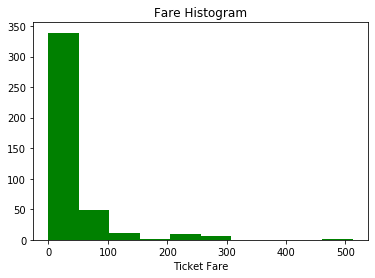

In [230]:
plt.title('Fare Histogram')
plt.xlabel('Ticket Fare')
plt.hist(cleaned_train_copy_4['Fare'], color='g')

In [231]:
cleaned_train_copy_4['Fare'].describe()

count    418.000000
mean      35.627188
std       55.840500
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [232]:
cleaned_train_copy_4.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,female,male,Age_Class,adult,infant,old,teenage,TicketCat,alphanum_ticket,decimal_ticket
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,No Cabin,...,0,1,adult,1,0,0,0,decimal_ticket,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,No Cabin,...,1,0,adult,1,0,0,0,decimal_ticket,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,No Cabin,...,0,1,old,0,0,1,0,decimal_ticket,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,No Cabin,...,0,1,adult,1,0,0,0,decimal_ticket,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,No Cabin,...,1,0,adult,1,0,0,0,decimal_ticket,0,1


In [233]:
#categories ticket from http://www.jamescamerononline.com/TitanicFAQ.htm
first_class_fare = range(150, 513)
second_class_fare = range(60, 150)
third_class_fare = range(0, 60)

In [234]:
index

RangeIndex(start=0, stop=418, step=1)

In [235]:
def FareCat(df):
    index = cleaned_train_copy_4.index
    global FareCatDF
    FareCatDF = pd.DataFrame(columns=['Class_Fare'], index=index)
    for i in index:
        if round(df.loc[i, 'Fare']) in first_class_fare:
            FareCatDF.loc[i, 'Class_Fare'] = 'first_class_fare'
        elif round(df.loc[i, 'Fare']) in second_class_fare:
            FareCatDF.loc[i, 'Class_Fare'] = 'second_class_fare'
        elif round(df.loc[i, 'Fare']) in third_class_fare:
            FareCatDF.loc[i, 'Class_Fare'] = 'third_class_fare'
        else:
            print(df.loc[i, 'Fare'])
    return FareCatDF

In [236]:
FareCat(cleaned_train_copy_4)

,Class_Fare
0,third_class_fare
1,third_class_fare
2,third_class_fare
3,third_class_fare
4,third_class_fare
5,third_class_fare
6,third_class_fare
7,third_class_fare
8,third_class_fare
9,third_class_fare


In [237]:
FareCatDF['Class_Fare'].value_counts()

third_class_fare     354
second_class_fare     42
first_class_fare      22
Name: Class_Fare, dtype: int64

In [238]:
FareCatDF_OHE = pd.get_dummies(FareCatDF)

In [239]:
cleaned_train_copy_4 = cleaned_train_copy_4.join([FareCatDF, FareCatDF_OHE])

In [240]:
cleaned_train_copy_4.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,infant,old,teenage,TicketCat,alphanum_ticket,decimal_ticket,Class_Fare,Class_Fare_first_class_fare,Class_Fare_second_class_fare,Class_Fare_third_class_fare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,No Cabin,...,0,0,0,decimal_ticket,0,1,third_class_fare,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,No Cabin,...,0,0,0,decimal_ticket,0,1,third_class_fare,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,No Cabin,...,0,1,0,decimal_ticket,0,1,third_class_fare,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,No Cabin,...,0,0,0,decimal_ticket,0,1,third_class_fare,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,No Cabin,...,0,0,0,decimal_ticket,0,1,third_class_fare,0,0,1


In [241]:
cleaned_train_copy_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 29 columns):
PassengerId                     418 non-null int64
Pclass                          418 non-null int64
Name                            418 non-null object
Sex                             418 non-null object
Age                             418 non-null float64
SibSp                           418 non-null int64
Parch                           418 non-null int64
Ticket                          418 non-null object
Fare                            418 non-null float64
Cabin                           418 non-null object
Embarked                        418 non-null object
Passenger_Class                 418 non-null object
first_class                     418 non-null uint8
second_class                    418 non-null uint8
third_class                     418 non-null uint8
female                          418 non-null uint8
male                            418 non-null uint8
Age_Class         

In [242]:
cleaned_train_copy_4['Cabin'].values

array(['No Cabin', 'No Cabin', 'No Cabin', 'No Cabin', 'No Cabin',
       'No Cabin', 'No Cabin', 'No Cabin', 'No Cabin', 'No Cabin',
       'No Cabin', 'No Cabin', 'B45', 'No Cabin', 'E31', 'No Cabin',
       'No Cabin', 'No Cabin', 'No Cabin', 'No Cabin', 'No Cabin',
       'No Cabin', 'No Cabin', 'No Cabin', 'B57 B59 B63 B66', 'No Cabin',
       'B36', 'No Cabin', 'A21', 'No Cabin', 'No Cabin', 'No Cabin',
       'No Cabin', 'No Cabin', 'C78', 'No Cabin', 'No Cabin', 'No Cabin',
       'No Cabin', 'No Cabin', 'No Cabin', 'D34', 'No Cabin', 'No Cabin',
       'D19', 'No Cabin', 'A9', 'No Cabin', 'D15', 'No Cabin', 'C31',
       'No Cabin', 'No Cabin', 'C23 C25 C27', 'No Cabin', 'No Cabin',
       'No Cabin', 'F G63', 'No Cabin', 'B61', 'No Cabin', 'No Cabin',
       'No Cabin', 'No Cabin', 'B57 B59 B63 B66', 'No Cabin', 'No Cabin',
       'No Cabin', 'C53', 'C23 C25 C27', 'No Cabin', 'No Cabin',
       'No Cabin', 'D43', 'C130', 'C132', 'No Cabin', 'C101', 'No Cabin',
       'No Cabi

In [243]:
"""Cabin classification
https://www.kaggle.com/c/titanic/discussion/4693
"""
import re
def CabinClass(df):
    index = cleaned_train_copy_4.index
    global CabClassDF
    CabClassDF = pd.DataFrame(index=index, columns=['Cab_Class'])
    for i in index:
        if re.match(r'A', df.loc[i, 'Cabin']):
            CabClassDF.loc[i, 'Cab_Class'] = 'A_deck'
        elif re.match(r'B', df.loc[i, 'Cabin']):
            CabClassDF.loc[i, 'Cab_Class'] = 'B_deck'
        elif re.match(r'C', df.loc[i, 'Cabin']):
            CabClassDF.loc[i, 'Cab_Class'] = 'C_deck'
        elif re.match(r'D', df.loc[i, 'Cabin']):
            CabClassDF.loc[i, 'Cab_Class'] = 'D_deck'
        elif re.match(r'E', df.loc[i, 'Cabin']):
            CabClassDF.loc[i, 'Cab_Class'] = 'E_deck'
        elif re.match(r'F', df.loc[i, 'Cabin']):
            CabClassDF.loc[i, 'Cab_Class'] = 'F_deck'
        elif re.match(r'G', df.loc[i, 'Cabin']):
            CabClassDF.loc[i, 'Cab_Class'] = 'G_deck'
        else:
            CabClassDF.loc[i, 'Cab_Class'] = 'low_deck'
    return CabClassDF.head(10)

In [244]:
CabinClass(cleaned_train_copy_4)

,Cab_Class
0,low_deck
1,low_deck
2,low_deck
3,low_deck
4,low_deck
5,low_deck
6,low_deck
7,low_deck
8,low_deck
9,low_deck


In [245]:
CabClassDF['Cab_Class'].value_counts()

low_deck    327
C_deck       35
B_deck       18
D_deck       13
E_deck        9
F_deck        8
A_deck        7
G_deck        1
Name: Cab_Class, dtype: int64

In [246]:
CabClassDF_OHE = pd.get_dummies(CabClassDF)

In [247]:
CabClassDF_OHE.head(10)

,Cab_Class_A_deck,Cab_Class_B_deck,Cab_Class_C_deck,Cab_Class_D_deck,Cab_Class_E_deck,Cab_Class_F_deck,Cab_Class_G_deck,Cab_Class_low_deck
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,1


In [248]:
cleaned_train_copy_4 = cleaned_train_copy_4.join([CabClassDF, CabClassDF_OHE]).copy()

In [249]:
cleaned_train_copy_4.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Class_Fare_third_class_fare,Cab_Class,Cab_Class_A_deck,Cab_Class_B_deck,Cab_Class_C_deck,Cab_Class_D_deck,Cab_Class_E_deck,Cab_Class_F_deck,Cab_Class_G_deck,Cab_Class_low_deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,No Cabin,...,1,low_deck,0,0,0,0,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,No Cabin,...,1,low_deck,0,0,0,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,No Cabin,...,1,low_deck,0,0,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,No Cabin,...,1,low_deck,0,0,0,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,No Cabin,...,1,low_deck,0,0,0,0,0,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,No Cabin,...,1,low_deck,0,0,0,0,0,0,0,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,No Cabin,...,1,low_deck,0,0,0,0,0,0,0,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,No Cabin,...,1,low_deck,0,0,0,0,0,0,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,No Cabin,...,1,low_deck,0,0,0,0,0,0,0,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,No Cabin,...,1,low_deck,0,0,0,0,0,0,0,1


In [250]:
cleaned_train_copy_4['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [251]:
Embarked_OHE = pd.get_dummies(cleaned_train_copy_4['Embarked'])

In [252]:
Embarked_OHE.head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [253]:
cleaned_train_copy_4 = cleaned_train_copy_4.join(Embarked_OHE).copy()

In [254]:
cleaned_train_copy_4.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Passenger_Class', 'first_class',
       'second_class', 'third_class', 'female', 'male', 'Age_Class', 'adult',
       'infant', 'old', 'teenage', 'TicketCat', 'alphanum_ticket',
       'decimal_ticket', 'Class_Fare', 'Class_Fare_first_class_fare',
       'Class_Fare_second_class_fare', 'Class_Fare_third_class_fare',
       'Cab_Class', 'Cab_Class_A_deck', 'Cab_Class_B_deck', 'Cab_Class_C_deck',
       'Cab_Class_D_deck', 'Cab_Class_E_deck', 'Cab_Class_F_deck',
       'Cab_Class_G_deck', 'Cab_Class_low_deck', 'C', 'Q', 'S'],
      dtype='object')

In [255]:
modified_data = cleaned_train_copy_4[['PassengerId', 'first_class', 'second_class', 'third_class', \
                                     'female', 'male', 'adult', 'infant', 'old', 'teenage', 'alphanum_ticket', \
                                     'decimal_ticket', 'Class_Fare_first_class_fare', 'Class_Fare_second_class_fare',\
                                     'Class_Fare_third_class_fare', 'Cab_Class_A_deck', 'Cab_Class_B_deck', 'Cab_Class_C_deck', 'Cab_Class_D_deck',\
                                     'Cab_Class_E_deck', 'Cab_Class_F_deck', 'Cab_Class_G_deck', 'Cab_Class_low_deck', 'C', 'Q', 'S']]

In [256]:
modified_data.head()

,PassengerId,first_class,second_class,third_class,female,male,adult,infant,old,teenage,...,Cab_Class_B_deck,Cab_Class_C_deck,Cab_Class_D_deck,Cab_Class_E_deck,Cab_Class_F_deck,Cab_Class_G_deck,Cab_Class_low_deck,C,Q,S
0,892,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,893,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,894,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,895,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,896,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [257]:
modified_data.to_csv('test_modified_data.csv')